In [6]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import numpy as np # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('D:\Internship\Prodigy ML\task 2'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [7]:
df=pd.read_csv("D:\Internship\Prodigy ML/task 2\Mall_Customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [8]:
df.isnull().sum()


CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [9]:
display("duplicated:",df.duplicated().sum())

'duplicated:'

0

In [10]:
X= df.iloc[:, [3,4]].values

In [11]:
from sklearn.cluster import KMeans


In [12]:
wcss = []

for i in range(1,11):
    km = KMeans(n_clusters=i)
    km.fit_predict(X)
    wcss.append(km.inertia_)

c:\Users\MUKUND DHANUKA\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\MUKUND DHANUKA\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\MUKUND DHANUKA\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\MUKUND DHANUKA\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You c

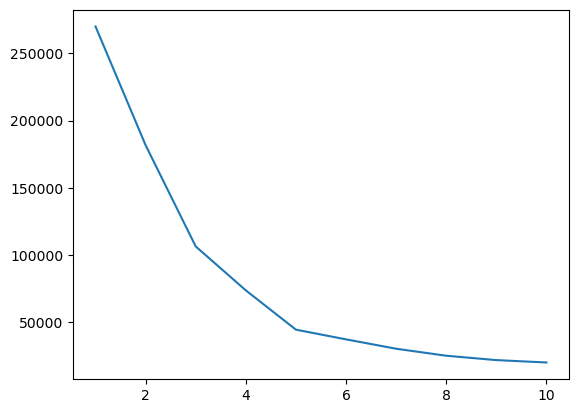

In [13]:
import matplotlib.pyplot as plt
plt.plot(range(1,11),wcss)


In [14]:
km = KMeans(n_clusters=5)
y_means = km.fit_predict(X)

c:\Users\MUKUND DHANUKA\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\MUKUND DHANUKA\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


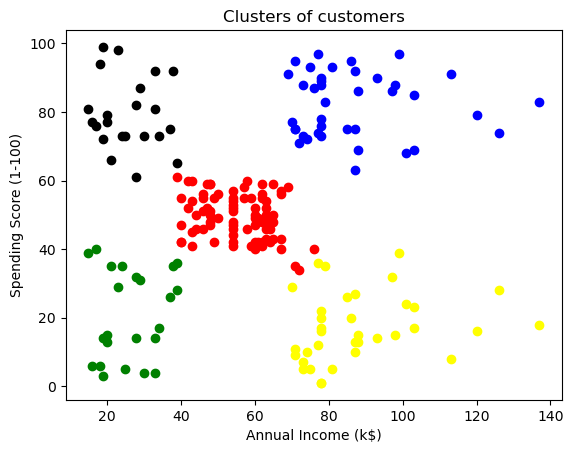

In [15]:
plt.scatter(X[y_means == 0,0],X[y_means == 0,1],color='blue')
plt.scatter(X[y_means == 1,0],X[y_means == 1,1],color='red')
plt.scatter(X[y_means == 2,0],X[y_means == 2,1],color='green')
plt.scatter(X[y_means == 3,0],X[y_means == 3,1],color='yellow')
plt.scatter(X[y_means == 4,0],X[y_means == 4,1],color='black')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()


In [16]:
df["Target"]=y_means

In [17]:
Clustered_df=df
Clustered_df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Target
0,1,Male,19,15,39,2
1,2,Male,21,15,81,4
2,3,Female,20,16,6,2
3,4,Female,23,16,77,4
4,5,Female,31,17,40,2


## Now our data is ready for classification.






In [18]:
X=Clustered_df.iloc[:,1:5]
y=Clustered_df.iloc[:,-1]


In [19]:
X.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [20]:
y.head()

0    2
1    4
2    2
3    4
4    2
Name: Target, dtype: int32

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler


In [22]:
le=LabelEncoder()
X['Gender'] = le.fit_transform(X['Gender'])


In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [24]:
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [25]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

In [26]:
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)

In [27]:
gbdt.fit(X_train,y_train)
y_pred=gbdt.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.975

In [28]:
y_pred=gbdt.predict(X_test)
y_pred

array([1, 4, 2, 3, 3, 1, 1, 3, 3, 1, 1, 3, 0, 1, 3, 0, 1, 3, 1, 1, 3, 2,
       3, 1, 1, 1, 1, 1, 0, 1, 4, 2, 1, 1, 3, 1, 0, 0, 3, 1])

In [29]:
prediction = pd.DataFrame({'Original Value': y_test, 'Predicted Value': y_pred})

# Print the DataFrame
display(prediction)

,Original Value,Predicted Value
95,1,1
15,4,4
30,2,2
158,3,3
128,3,3
115,1,1
69,1,1
170,3,3
174,3,3
45,4,1
